# KNN Anonymized Data 
KNN model predicting class of a new data point based off of its features using an anonymized data set.

## Import Libraries



In [1]:
import numpy as np
import pandas as pd

In [38]:
# Import data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Get the Data

Set index_col=0 to use the first column as the index.

In [5]:
df = pd.read_csv('Classified Data', index_col = 0)
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


## Standardize the Variables

Because the KNN classifier predicts the class of a given test observation by identifying the observations that are nearest to it, the scale of the variables matters. Any variables that are on a large scale will have a much larger effect on the distance between the observations, and hence on the KNN classifier, than variables that are on a small scale.

Thus, when using k-nearest neighbors to classify, everything should be standardized to the same scale.

In [7]:
# Import StandardSCaler
from sklearn.preprocessing import StandardScaler

In [8]:
# Create instance of standard scaler
scaler = StandardScaler()

In [12]:
# Fit scaler object to feature columns
scaler.fit(df.drop('TARGET CLASS', axis = 1)) # everything but target class

StandardScaler(copy=True, with_mean=True, with_std=True)

In [14]:
# Use scaler object to do a transformation
scaled_features = scaler.transform(df.drop('TARGET CLASS', axis = 1))# performs the standardization bycentering and scaling
scaled_features

array([[-0.12354188,  0.18590747, -0.91343069, ..., -1.48236813,
        -0.9497194 , -0.64331425],
       [-1.08483602, -0.43034845, -1.02531333, ..., -0.20224031,
        -1.82805088,  0.63675862],
       [-0.78870217,  0.33931821,  0.30151137, ...,  0.28570652,
        -0.68249379, -0.37784986],
       ..., 
       [ 0.64177714, -0.51308341, -0.17920486, ..., -2.36249443,
        -0.81426092,  0.11159651],
       [ 0.46707241, -0.98278576, -1.46519359, ..., -0.03677699,
         0.40602453, -0.85567   ],
       [-0.38765353, -0.59589427, -1.4313981 , ..., -0.56778932,
         0.3369971 ,  0.01034996]])

In [15]:
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [19]:
# Use scaled features variable to recreate a features dataframe
df_feat = pd.DataFrame(scaled_features, columns = df.columns[:-1])
df_feat.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


## Train Test Split

In [21]:
from sklearn.model_selection import train_test_split

In [23]:
x = df_feat
y =df['TARGET CLASS']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=101)

## Using KNN

The objective is to build a model that predicts whether someone will be in the TARGET CLASS or not. A good first step is start with k=1.

In [27]:
# Import model
from sklearn.neighbors import KNeighborsClassifier

In [28]:
# Create model
knn = KNeighborsClassifier(n_neighbors = 1)

In [29]:
# Fit training data
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [30]:
# Predictions
pred = knn.predict(x_test)

## Predictions and Evaluations

In [32]:
# Import functions
from sklearn.metrics import classification_report, confusion_matrix

In [34]:
# Print confusion matrix
print(confusion_matrix(y_true= y_test, y_pred=pred ))

# Print classification report
print(classification_report(y_true=y_test, y_pred = pred))

[[151   8]
 [ 15 126]]
             precision    recall  f1-score   support

          0       0.91      0.95      0.93       159
          1       0.94      0.89      0.92       141

avg / total       0.92      0.92      0.92       300



With a precision of 92%, the model performs well using k = 1 but more could be squeezed out of it by choosing an even better k value.

## Choosing a K Value - Elbow Method
Elbow method iterates many models using many different k values and plots out their error rates to see which is the lowest.

In [36]:
# Function
error_rate = []

for i in range (1,40):
    
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

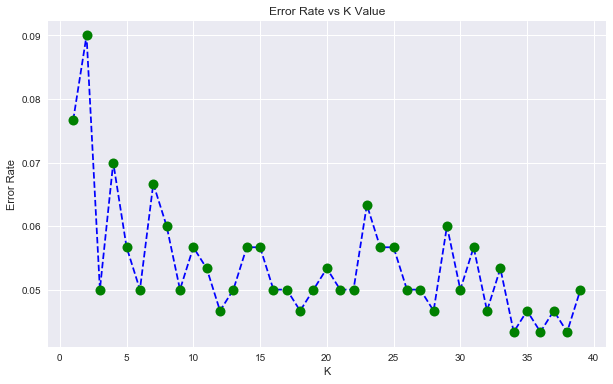

In [41]:
# Plot error rate
plt.figure(figsize = (10,6))
plt.plot(range(1,40), error_rate, color = 'blue', linestyle = '--', marker = 'o', 
        markerfacecolor = 'green', markersize = 10)

plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

At K=17, the error rate tends to hover just under .05 so I will retrain the model with that value and check the classification report.

In [43]:
# Retrain model
knn = KNeighborsClassifier(n_neighbors=17)
knn.fit(x_train, y_train)
pred = knn.predict(x_test)

# Print confusion matrix
print(confusion_matrix(y_test,pred))

# Print classification report
print(classification_report(y_test, pred))

[[153   6]
 [  9 132]]
             precision    recall  f1-score   support

          0       0.94      0.96      0.95       159
          1       0.96      0.94      0.95       141

avg / total       0.95      0.95      0.95       300



As shown above, the model's accuracy, precision, and recall improved to 95% by using the elbow method to find the optimal k value.